In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [10]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
data = pd.read_csv('twitter_training.csv', names=col_names)

In [11]:
data.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [13]:
data.shape

(74682, 4)

In [14]:
data.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [15]:
data.describe

<bound method NDFrame.describe of          ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                 Content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac wind

In [16]:
data.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [17]:
data.dropna(axis=0, inplace=True)

In [18]:
data.isnull().sum()

ID           0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [19]:
data.duplicated().sum()

np.int64(2340)

In [20]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [21]:
data.columns

Index(['ID', 'Entity', 'Sentiment', 'Content'], dtype='object')

In [22]:
data.index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       74672, 74673, 74674, 74675, 74676, 74677, 74678, 74679, 74680, 74681],
      dtype='int64', length=71656)

In [23]:
data.size

286624

In [24]:
def analyze_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    else:
        return 0.0

In [25]:
data['Polarity'] = data['Content'].apply(analyze_sentiment)
data['Sentiment_Label'] = data['Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

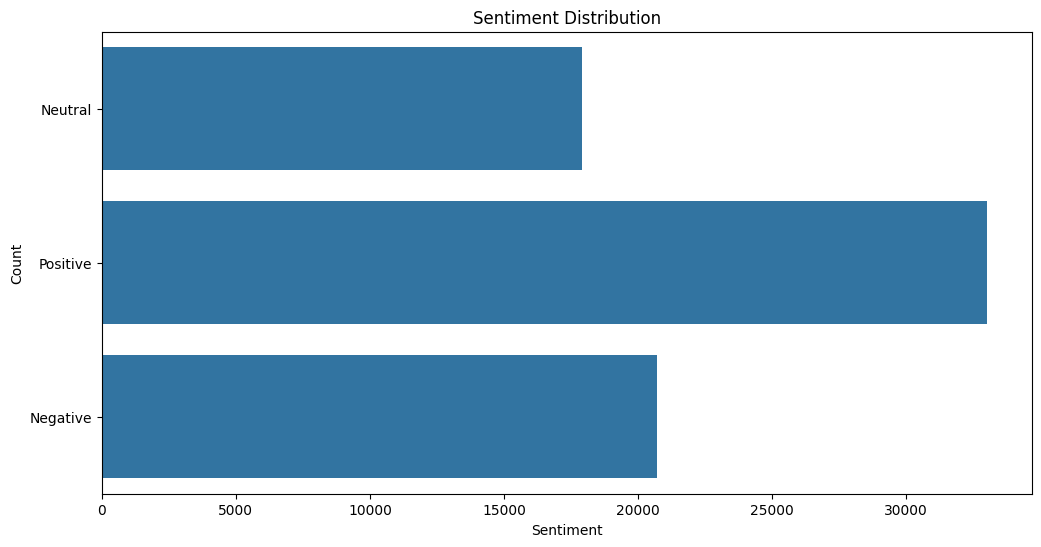

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data['Sentiment_Label'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

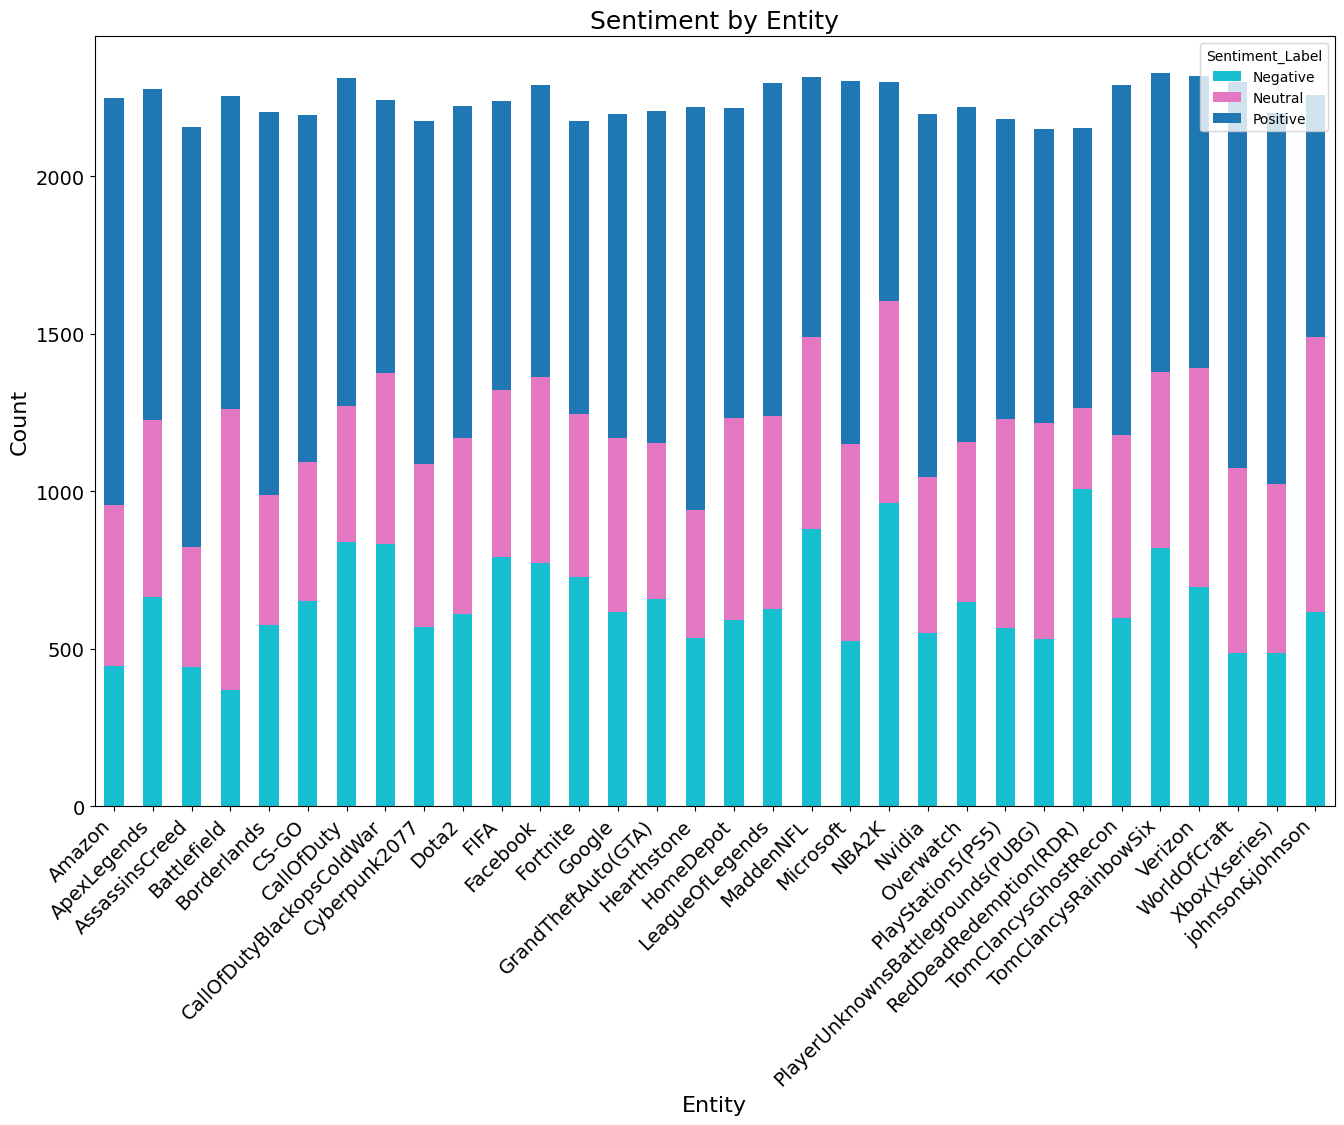

In [33]:

sentiment_by_Entity = data.pivot_table(index='Entity', columns='Sentiment_Label', aggfunc='size', fill_value=0)
colors = ['#17becf', '#e377c2', '#1f77b4']  # Example colors: blue, orange, green
ax = sentiment_by_Entity.plot(kind='bar', stacked=True, figsize=(16, 10), color=colors)


plt.title('Sentiment by Entity', fontsize=18)
plt.xlabel('Entity', fontsize=16)
plt.ylabel('Count', fontsize=16)


plt.xticks(rotation=45, ha='right', fontsize=14)


plt.yticks(fontsize=14)


plt.show()



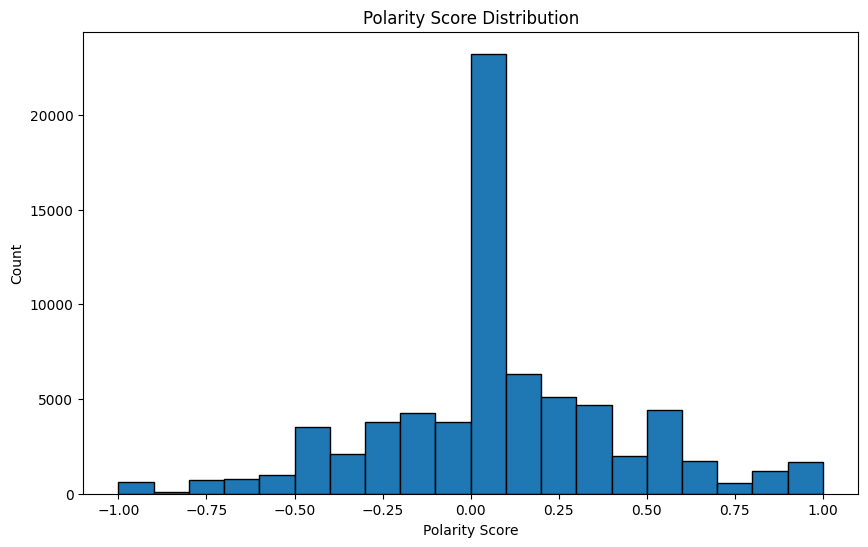

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(data['Polarity'], bins=20, edgecolor='k')
plt.title('Polarity Score Distribution')
plt.xlabel('Polarity Score')
plt.ylabel('Count')
plt.show()

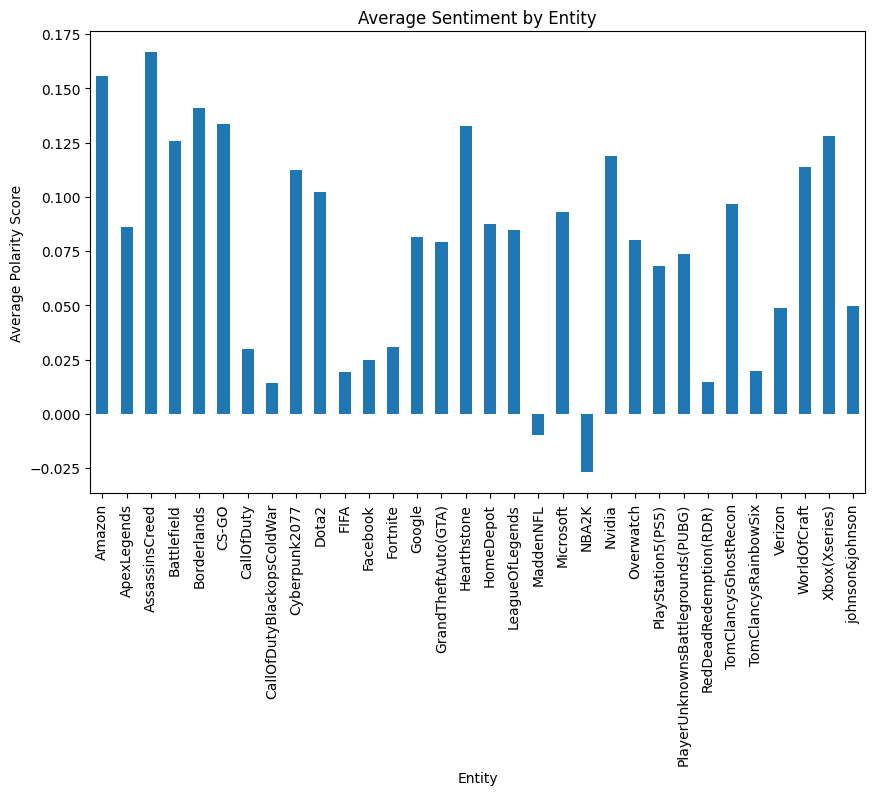

In [35]:
plt.figure(figsize=(10, 6))
average_polarity_by_entity = data.groupby('Entity')['Polarity'].mean()
average_polarity_by_entity.plot(kind='bar')
plt.title('Average Sentiment by Entity')
plt.xlabel('Entity')
plt.ylabel('Average Polarity Score')
plt.show()

In [39]:
most_positive_tweet = data[data['Polarity'] == data['Polarity'].max()]['Content'].values[0]
print('Most Positive Tweet:')
print(most_positive_tweet)


Most Positive Tweet:
Platinum is the best loot @Borderlands  
